In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime
import tensorflow as tf

Using TensorFlow backend.
C:\Users\ICT01_06\Anaconda3\envs\tf_test22\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_06\Anaconda3\envs\tf_test22\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_06\Anaconda3\envs\tf_test22\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_06\Anaconda

In [37]:
import tensorflow as tf

In [22]:
data = pd.read_csv('EBAY.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-05,22.664141,22.941919,22.605219,22.849327,22.509346,14671800
1,2015-02-06,22.811447,23.106060,22.752525,22.937710,22.596413,19006500
2,2015-02-09,22.731482,23.076599,22.731482,22.866161,22.525930,10209900
3,2015-02-10,22.912458,23.388046,22.676767,23.261784,22.915667,25966100
4,2015-02-11,23.324915,23.337542,23.000841,23.207071,22.861767,14791500


In [23]:
data = data.dropna()

In [24]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [25]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [26]:
mid_prices[index:]

array([35.195    , 34.995001 , 35.       , 35.       , 35.9349995,
       35.66     , 35.8549995, 35.6549985, 35.215    , 34.6849995,
       35.0250015, 34.93     , 35.0250015, 34.7399995, 34.83     ,
       34.835001 , 35.16     , 35.514999 , 35.5799995, 35.6100005,
       35.625    , 35.8199995, 36.129999 , 36.33     , 36.1899985,
       36.3549995, 36.195002 , 35.959999 , 35.83     , 36.3199995,
       35.9399985, 35.6399995, 35.5249995, 35.825001 , 35.210001 ,
       35.0100005, 34.725    , 34.9399985, 35.385    , 35.630001 ,
       35.5900005, 35.665001 , 35.8500005, 35.7649995, 35.4449995,
       35.245001 , 35.9700015, 34.9399985, 34.6949995, 34.279999 ,
       34.119999 , 36.799999 ])

In [27]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1086, 50, 1), (121, 50, 1))

In [38]:
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True

session = tf.Session(config=config)

In [40]:
import keras.backend.tensorflow_backend as K
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
    model.add(LSTM(64, return_sequences=True, input_shape=(50, 1)))
    model.add(LSTM(74, return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')

In [ ]:
import keras.backend.tensorflow_backend as K
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(LSTM(60, return_sequences=True, input_shape=(50, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(70, return_sequences=True, input_shape=(50, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(80, return_sequences=True, input_shape=(50, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(40, return_sequences=False))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50, 64)            29440     
_________________________________________________________________
lstm_15 (LSTM)               (None, 74)                41144     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 75        
Total params: 81,059
Trainable params: 81,059
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=12,
    epochs=20)

Train on 1086 samples, validate on 121 samples
Epoch 1/20
1086/1086 [==============================] - 13s 12ms/step - loss: 0.0028 - val_loss: 6.5480e-04
Epoch 2/20
1086/1086 [==============================] - 11s 11ms/step - loss: 0.0013 - val_loss: 5.6520e-04
Epoch 3/20
1086/1086 [==============================] - 11s 10ms/step - loss: 9.8995e-04 - val_loss: 3.6773e-04
Epoch 4/20
1086/1086 [==============================] - 11s 10ms/step - loss: 8.1703e-04 - val_loss: 4.1069e-04
Epoch 5/20
1086/1086 [==============================] - 12s 11ms/step - loss: 7.1681e-04 - val_loss: 3.5730e-04
Epoch 6/20
1086/1086 [==============================] - 11s 10ms/step - loss: 6.1411e-04 - val_loss: 2.8554e-04
Epoch 7/20
1086/1086 [==============================] - 11s 10ms/step - loss: 5.1794e-04 - val_loss: 3.2225e-04
Epoch 8/20
1086/1086 [==============================] - 11s 10ms/step - loss: 5.0266e-04 - val_loss: 2.5953e-04
Epoch 9/20
1086/1086 [==============================] - 11s 10ms/

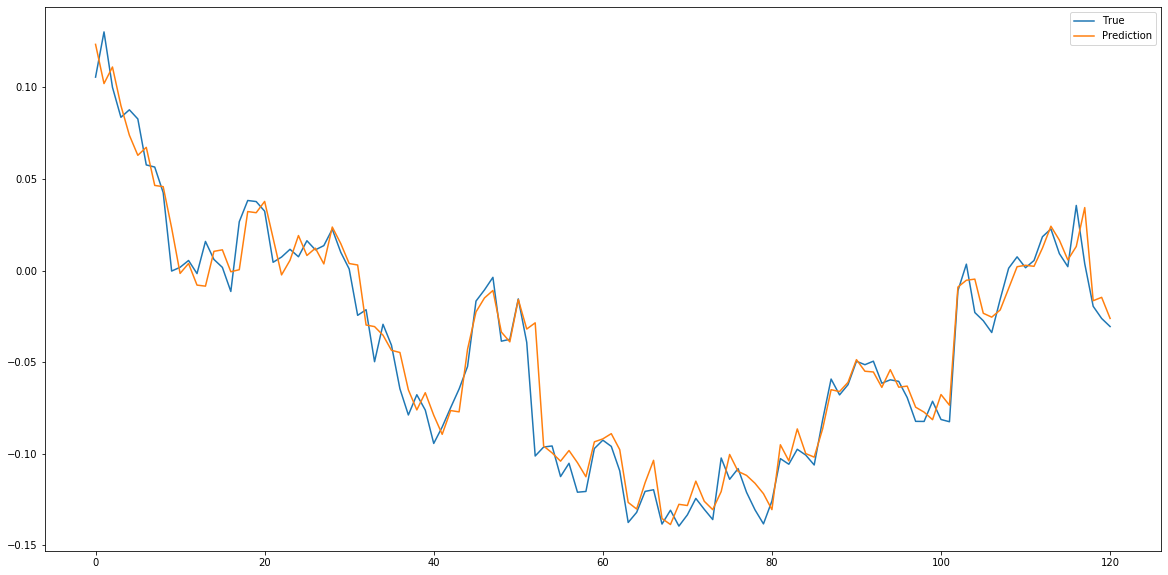

In [43]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()